In [32]:
# Load data
import numpy as np
import pandas as pd
df = pd.read_csv("heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [33]:
df.shape

(918, 12)

In [34]:
# Show unique values from each column
for col in df.columns:
  print(col+":-")
  print(df[col].unique())
  print("----------------------------------------")

Age:-
[40 49 37 48 54 39 45 58 42 38 43 60 36 44 53 52 51 56 41 32 65 35 59 50
 47 31 46 57 55 63 66 34 33 61 29 62 28 30 74 68 72 64 69 67 73 70 77 75
 76 71]
----------------------------------------
Sex:-
['M' 'F']
----------------------------------------
ChestPainType:-
['ATA' 'NAP' 'ASY' 'TA']
----------------------------------------
RestingBP:-
[140 160 130 138 150 120 110 136 115 100 124 113 125 145 112 132 118 170
 142 190 135 180 108 155 128 106  92 200 122  98 105 133  95  80 137 185
 165 126 152 116   0 144 154 134 104 139 131 141 178 146 158 123 102  96
 143 172 156 114 127 101 174  94 148 117 192 129 164]
----------------------------------------
Cholesterol:-
[289 180 283 214 195 339 237 208 207 284 211 164 204 234 273 196 201 248
 267 223 184 288 215 209 260 468 188 518 167 224 172 186 254 306 250 177
 227 230 294 264 259 175 318 216 340 233 205 245 194 270 213 365 342 253
 277 202 297 225 246 412 265 182 218 268 163 529 100 206 238 139 263 291
 229 307 210 329 147  85 269

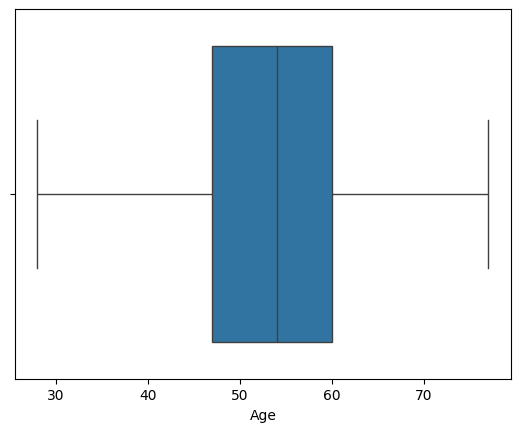

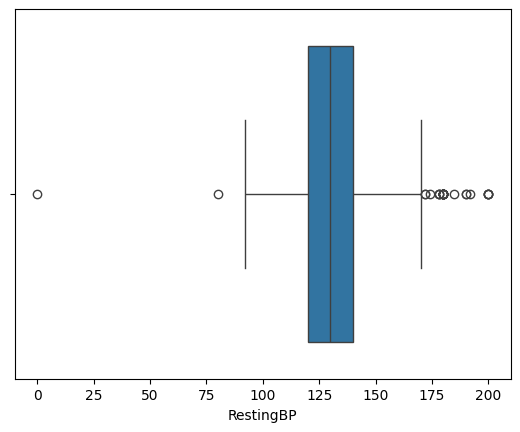

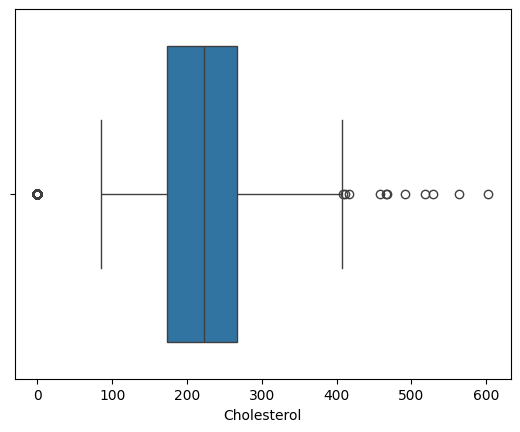

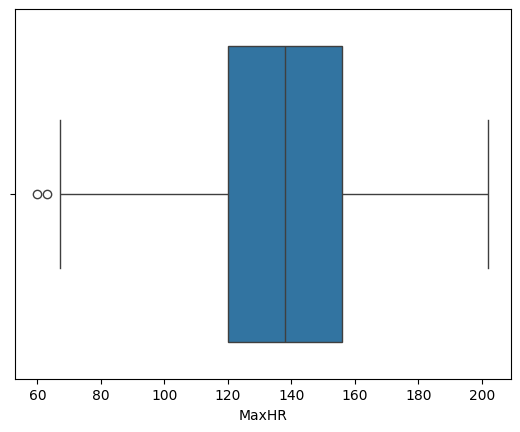

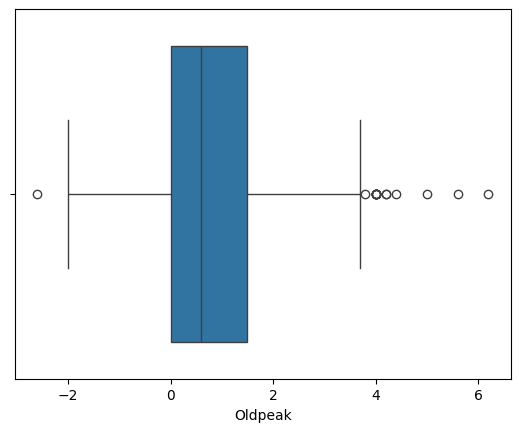

In [35]:
# Showing boxplots for cols with outliers
import seaborn as sns
import matplotlib.pyplot as plt
col_outliers = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
for col in col_outliers:
  sns.boxplot(x=df[col])
  plt.show()

In [36]:
# Handling outliers using Z_score
for col in col_outliers:
  lower = df[col].mean() - 3*df[col].std()
  upper = df[col].mean() + 3*df[col].std()
  df = df[(df[col]<upper) & (df[col]>lower)]

df.shape

(899, 12)

In [38]:
# Apply scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df[col_outliers] = sc.fit_transform(df[col_outliers])
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.428154,M,ATA,0.465900,0.849636,0,Normal,1.384320,N,-0.855469,Up,0
1,-0.475855,F,NAP,1.634714,-0.168122,0,Normal,0.752973,N,0.137516,Flat,1
2,-1.745588,M,ATA,-0.118507,0.793612,0,ST,-1.535661,N,-0.855469,Up,0
3,-0.581666,F,ASY,0.349019,0.149344,0,Normal,-1.141069,Y,0.634008,Flat,1
4,0.053200,M,NAP,1.050307,-0.028064,0,Normal,-0.588640,N,-0.855469,Up,0


In [39]:
# Applying OrdinalEncoder on given columns
from sklearn.preprocessing import OrdinalEncoder
cols_ordinal = ['Sex', 'ExerciseAngina']

oe = OrdinalEncoder()
df[cols_ordinal] = oe.fit_transform(df[cols_ordinal])
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.428154,1.0,ATA,0.465900,0.849636,0,Normal,1.384320,0.0,-0.855469,Up,0
1,-0.475855,0.0,NAP,1.634714,-0.168122,0,Normal,0.752973,0.0,0.137516,Flat,1
2,-1.745588,1.0,ATA,-0.118507,0.793612,0,ST,-1.535661,0.0,-0.855469,Up,0
3,-0.581666,0.0,ASY,0.349019,0.149344,0,Normal,-1.141069,1.0,0.634008,Flat,1
4,0.053200,1.0,NAP,1.050307,-0.028064,0,Normal,-0.588640,0.0,-0.855469,Up,0


In [40]:
from sklearn.preprocessing import OneHotEncoder
cols_ohe = ["ChestPainType", "RestingECG", "ST_Slope"]

ohe = OneHotEncoder(drop="first", sparse_output=False)
ohe_array = ohe.fit_transform(df[cols_ohe])
ohe_df = pd.DataFrame(ohe_array, columns=ohe.get_feature_names_out(), index=df.index)
df = pd.concat([df, ohe_df], axis=1)
df = df.drop(cols_ohe, axis=1)
df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,-1.428154,1.0,0.465900,0.849636,0,1.384320,0.0,-0.855469,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,-0.475855,0.0,1.634714,-0.168122,0,0.752973,0.0,0.137516,1,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,-1.745588,1.0,-0.118507,0.793612,0,-1.535661,0.0,-0.855469,0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,-0.581666,0.0,0.349019,0.149344,0,-1.141069,1.0,0.634008,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.053200,1.0,1.050307,-0.028064,0,-0.588640,0.0,-0.855469,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [41]:
df.shape

(899, 16)

In [43]:
# Splitting data In X and Y
X = df.drop("HeartDisease", axis=1)
Y = df["HeartDisease"]

In [48]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [54]:
# Applying SVM standalone
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

scores = cross_val_score(SVC(), X, Y, cv=5)
scores.mean()

np.float64(0.827473618870267)

In [55]:
# Applying SVM with bagging
from sklearn.ensemble import BaggingClassifier

bag_model = BaggingClassifier(
    estimator=SVC(),
    n_estimators=100,
    oob_score=True
)

bag_model.fit(X, Y)
bag_model.oob_score_

0.8731924360400445

In [56]:
bag_model.score(X_test, Y_test)

0.8722222222222222

In [57]:
# Apply Decision tree Standalone
from sklearn.tree import DecisionTreeClassifier

scores = cross_val_score(DecisionTreeClassifier(), X, Y, cv=5)
scores.mean()

np.float64(0.7207014276846678)

In [58]:
# Apply Decsion tree with bagging
bag_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=100,
    oob_score=True
)

bag_model.fit(X, Y)
bag_model.oob_score_

0.8520578420467185

In [59]:
bag_model.score(X_test, Y_test)

1.0

In [60]:
# Applying Random forest (same as decision tree with bagging) => gives same accuracy
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(oob_score=True)
model.fit(X, Y)
print(model.oob_score_)
print(model.score(X_test, Y_test))

0.8676307007786429
1.0
